# Titanic Disaster Walkthrough

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Import data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train_y = train.Survived

# Concatenate training and test sets
full = pd.concat([train.drop(['Survived'], axis=1), test])

## Examining the Dataset & Feature Engineering

In [2]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [3]:
full.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
374,1266,1,"Dodge, Mrs. Washington (Ruth Vidaver)",female,54.0,1,1,33638,81.8583,A34,S
696,697,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
668,669,3,"Cook, Mr. Jacob",male,43.0,0,0,A/5 3536,8.0500,NaN,S
97,989,3,"Makinen, Mr. Kalle Edvard",male,29.0,0,0,STON/O 2. 3101268,7.9250,NaN,S
716,717,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C
303,1195,3,"Pokrnic, Mr. Tome",male,24.0,0,0,315092,8.6625,NaN,S
797,798,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S
229,230,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S
744,745,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,NaN,S
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C


In [4]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [5]:
train.groupby('Pclass').Pclass.count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

`Pclass 1` passengers make up 26%(216/891) of the passengers on board, yet 63% of them susrvive, as apposed to `Pclass 3` which make up 60% (491/891) of the passengers yet only 23% survive.

In [6]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [7]:
train.groupby('Sex').Sex.count()

Sex
female    314
male      577
Name: Sex, dtype: int64

Women make up 35% (314/891) of the passengers, yet 74% survive, as apposed to only 19% of men.

Extract the 'Title' from 'Name' and save to a new 'Title' feature

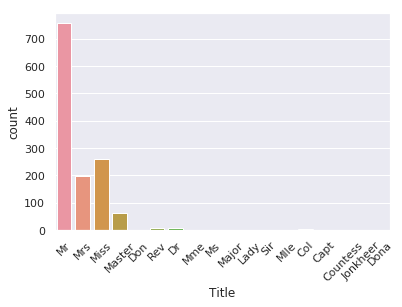

In [8]:
full['Title'] = full.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

# plot the titles
sns.countplot(x='Title', data=full)
plt.xticks(rotation=45);

We'll group the rarer 'Title's in to 'one' bucket - 'Special'

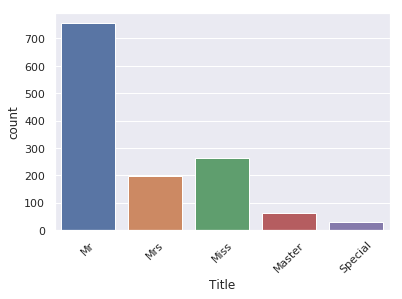

In [9]:
full['Title'] = full['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
full['Title'] = full['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')
sns.countplot(x='Title', data=full);
plt.xticks(rotation=45);

A large number of passengers have no cabin value, `NaN`. It is reasonable to presume that those NaNs didn't have a cabin, which may tell us something about 'Survival' so now create a new column that encodes this information.

In [10]:
full['hasCabin'] = ~full.Cabin.isnull()

In [11]:
full.sample(10).T

,43,595,637,729,399,83,150,514,533,520
PassengerId,44,596,638,730,400,975,1042,515,534,521
Pclass,2,3,2,3,2,3,1,3,3,1
Name,"Laroche, Miss. Simonne Marie Anne Andree","Van Impe, Mr. Jean Baptiste","Collyer, Mr. Harvey","Ilmakangas, Miss. Pieta Sofia","Trout, Mrs. William H (Jessie L)","Demetri, Mr. Marinko","Earnshaw, Mrs. Boulton (Olive Potter)","Coleff, Mr. Satio","Peter, Mrs. Catherine (Catherine Rizk)","Perreault, Miss. Anne"
Sex,female,male,male,female,female,male,female,male,female,female
Age,3,36,31,25,28,NaN,23,24,NaN,30
SibSp,1,1,1,1,0,0,0,0,0,0
Parch,2,1,1,0,0,0,1,0,2,0
Ticket,SC/Paris 2123,345773,C.A. 31921,STON/O2. 3101271,240929,349238,11767,349209,2668,12749
Fare,41.5792,24.15,26.25,7.925,12.65,7.8958,83.1583,7.4958,22.3583,93.5
Cabin,NaN,NaN,NaN,NaN,NaN,NaN,C54,NaN,NaN,B73


We'll combine the `SibSp` and `Parch` columns to make a family column

In [12]:
# add the passenger to the group
full['Family'] = full['SibSp'] + full['Parch'] + 1

We'll check to see if there is any crrelation between family size and survival.

In [13]:
train['Family'] = train['SibSp'] + train['Parch'] + 1
train[['Family', 'Survived']].groupby(['Family'], as_index=False).mean()

,Family,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


A person on their own had only a 30% chance of survival, groups of 2,3 or 4 members had at least a 50% chance of survival. This could be related to age, large numbers of 20-30 year olds were traveling on their own and died.

Handling the missing fields, `Age`, `Fare` and `Embarcation`:

In [14]:
full['Embarked'] = full.Embarked.fillna('S') # most common
full['Fare']= full.Fare.fillna(full.Fare.median())
full['Age'] = full.Age.fillna(full.Age.median())

In [15]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Title          1309 non-null object
hasCabin       1309 non-null bool
Family         1309 non-null int64
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 184.5+ KB


In [16]:
full.sample(10).T

,165,797,242,103,203,339,283,837,486,725
PassengerId,1057,798,1134,995,1095,340,284,838,487,726
Pclass,3,3,1,3,2,1,3,3,1,3
Name,"Kink-Heilmann, Mrs. Anton (Luise Heilmann)","Osman, Mrs. Mara","Spedden, Mr. Frederic Oakley","Johansson Palmquist, Mr. Oskar Leander","Quick, Miss. Winifred Vera","Blackwell, Mr. Stephen Weart","Dorking, Mr. Edward Arthur","Sirota, Mr. Maurice","Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)","Oreskovic, Mr. Luka"
Sex,female,female,male,male,female,male,male,male,female,male
Age,26,31,45,26,8,45,19,28,35,20
SibSp,1,0,1,0,1,0,0,0,1,0
Parch,1,0,1,0,1,0,0,0,0,0
Ticket,315153,349244,16966,347070,26360,113784,A/5. 10482,392092,19943,315094
Fare,22.025,8.6833,134.5,7.775,26,35.5,8.05,8.05,90,8.6625
Cabin,NaN,NaN,E34,NaN,NaN,T,NaN,NaN,C93,NaN


Convert `Age` and `Fare` variables into ranges. Will be represented as categories from 0-3

In [17]:
full['catAge'] = pd.qcut(full.Age, q=4, labels=False)
full['catFare'] = pd.qcut(full.Fare, q=4, labels=False)

In [18]:
full.sample(10).T

,94,122,660,557,401,807,186,310,504,176
PassengerId,95,1014,661,558,1293,808,187,1202,505,177
Pclass,3,1,1,1,2,3,3,3,1,3
Name,"Coxon, Mr. Daniel","Schabert, Mrs. Paul (Emma Mock)","Frauenthal, Dr. Henry William","Robbins, Mr. Victor","Gale, Mr. Harry","Pettersson, Miss. Ellen Natalia","O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)","Cacic, Mr. Jego Grga","Maioni, Miss. Roberta","Lefebre, Master. Henry Forbes"
Sex,male,female,male,male,male,female,female,male,female,male
Age,59,35,50,28,38,18,28,18,16,28
SibSp,0,1,2,0,1,0,1,0,0,3
Parch,0,0,0,0,0,0,0,0,0,1
Ticket,364500,13236,PC 17611,PC 17757,28664,347087,370365,315091,110152,4133
Fare,7.25,57.75,133.65,227.525,21,7.775,15.5,8.6625,86.5,25.4667
Cabin,NaN,C28,NaN,NaN,NaN,NaN,NaN,NaN,B79,NaN


Extract the columns that we'll use to train our model

In [19]:
full.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'hasCabin', 'Family',
       'catAge', 'catFare'],
      dtype='object')

In [20]:
full_subset = full[['Pclass', 'Sex', 'SibSp', 'Parch',
        'Embarked', 'Title', 'hasCabin', 'Family',
       'catAge', 'catFare']]

full_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Parch       1309 non-null int64
Embarked    1309 non-null object
Title       1309 non-null object
hasCabin    1309 non-null bool
Family      1309 non-null int64
catAge      1309 non-null int64
catFare     1309 non-null int64
dtypes: bool(1), int64(6), object(3)
memory usage: 143.5+ KB


In [21]:
full_subset.sample(10)

,Pclass,Sex,SibSp,Parch,Embarked,Title,hasCabin,Family,catAge,catFare
653,3,female,0,0,Q,Miss,False,1,1,0
399,3,male,0,0,Q,Mr,False,1,2,0
758,3,male,0,0,S,Mr,False,1,2,1
743,3,male,1,0,S,Mr,False,2,1,2
401,3,male,0,0,S,Mr,False,1,1,1
295,1,male,0,0,C,Mr,False,1,1,2
237,2,female,0,2,S,Miss,False,3,0,2
704,3,male,1,0,S,Mr,False,2,1,0
230,2,male,0,0,S,Mr,False,1,0,3
714,2,male,0,0,S,Mr,False,1,3,1


Convert `Embarked` and `Title` into numerical values

In [22]:
full_subset = pd.get_dummies(full_subset)
full_subset.sample(5).T

,194,577,466,505,542
Pclass,1,1,2,1,3
SibSp,0,1,0,1,4
Parch,0,0,0,0,2
hasCabin,True,True,False,True,False
Family,1,2,1,2,7
catAge,3,3,1,0,0
catFare,2,3,0,3,2
Sex_female,1,1,0,0,1
Sex_male,0,0,1,1,0
Embarked_C,1,0,0,1,0


## Build our Model

Split the data back into training and test sets

In [23]:
train_subset = full_subset[:891] # row 0-890(PassengerId 891)
test_subset = full_subset[891:]

# transform the data into arrays for scikitlearn
# X = train_subset.values
# y = train_y.values
# test = test_subset.values

In [24]:
# import scikit-learn
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics

In [25]:
# train the model
m = RandomForestRegressor(n_jobs=-1)
m.fit(train_subset, train_y)

/media/theboymo/d64061fd-29fa-457c-8209-b6a7ed06885f/home/theboymo/MiniConda/envs/ml37/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [63]:
# predict survical
Y_pred = m.predict(test_subset)
df_test = pd.DataFrame()
df_test['PassengerId'] = test['PassengerId']
df_test['Survived'] = Y_pred
df_test.head(10).T

,0,1,2,3,4,5,6,7,8,9
PassengerId,892.000000,893.0,894.000000,895.000000,896.0,897.000000,898.000000,899.000,900.0,901.0
Survived,0.191667,0.1,0.102839,0.079323,0.7,0.113584,0.342747,0.025,1.0,0.0


In [64]:
df_test['Survived'] = df_test.Survived.apply(lambda x: 1 if x >= 0.75 else 0)
df_test.head(10).T

,0,1,2,3,4,5,6,7,8,9
PassengerId,892,893,894,895,896,897,898,899,900,901
Survived,0,0,0,0,0,0,0,0,1,0


In [65]:
# save file with predictions to test on kaggle
df_test.to_csv('predictions/titanic-sklearn-random-forest.csv', index=False)

Submission scored: 0.74641(0.5), 0.76076(0.6), 0.77990(0.65), 0.77990(0.70), 0.77511(0.75)
                  